# Faster RCNN- Caffe
### Feb 2018

### Initial setup

In [3]:
# get the cifar10 dataset and create lmdbs
%cd /opt/caffe
!bash ./data/cifar10/get_cifar10.sh
!bash ./examples/cifar10/create_cifar10.sh

/opt/caffe
Downloading...
--2018-03-07 22:01:35--  http://www.cs.toronto.edu/~kriz/cifar-10-binary.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170052171 (162M) [application/x-gzip]
Saving to: 'cifar-10-binary.tar.gz'

cifar-10-binary.tar 100%[===================>] 162.17M  3.13MB/s    in 52s     

2018-03-07 22:02:28 (3.11 MB/s) - 'cifar-10-binary.tar.gz' saved [170052171/170052171]

Unzipping...
Done.
Creating lmdb...
I0307 22:02:31.688977    49 db_lmdb.cpp:35] Opened lmdb examples/cifar10/cifar10_train_lmdb
I0307 22:02:31.701289    49 convert_cifar_data.cpp:52] Writing Training data
I0307 22:02:31.701303    49 convert_cifar_data.cpp:55] Training Batch 1
I0307 22:02:31.741472    49 convert_cifar_data.cpp:55] Training Batch 2
I0307 22:02:31.787108    49 convert_cifar_data.cpp:55] Training Batch 3
I0307 22:02:31.809831  

#### Check out the solver file - cifar10_quick_solver.prototxt and cifar10_quick_solver_lr1.prototxt
#### Solver is pointing to Net Architecture in cifar10_quick_train_test.prototxt

In [4]:
# Showing contents of train_quick.sh
!cat ./examples/cifar10/train_quick.sh

#!/usr/bin/env sh
set -e

TOOLS=./build/tools

$TOOLS/caffe train \
  --solver=examples/cifar10/cifar10_quick_solver.prototxt $@

# reduce learning rate by factor of 10 after 8 epochs
$TOOLS/caffe train \
  --solver=examples/cifar10/cifar10_quick_solver_lr1.prototxt \
  --snapshot=examples/cifar10/cifar10_quick_iter_4000.solverstate $@


1 epoch = 500 iteration, 
epoch is number of times forward and backward pass for whole data. Whereas number of iteration is just total number of forward and backward pass operation performed. Here batch size is 100, 1 epoch = total_size/batch_size = 50000/100 = 500 iterations

#### Display Net Architecture

In [5]:
# execute the draw_net.py from caffe root dir
!python3 ./python/draw_net.py ./examples/cifar10/cifar10_quick_train_test.prototxt outImg.png

Drawing net to outImg.png


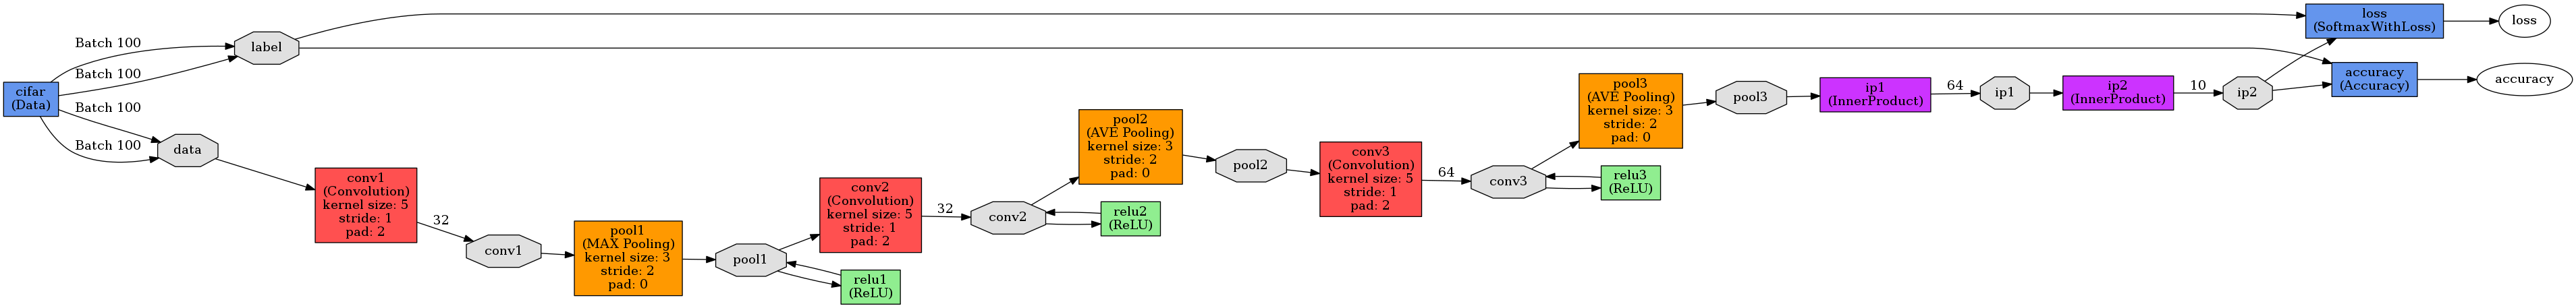

In [6]:
# show the net architecture
from IPython.display import Image
Image("outImg.png")

right-click on the image and open it in a new tab to examine it

<br>There are 2 average pooling layers <br>
<br>
train phase has loss <br>
test phase: loss and accuracy <br>
<br>
Data dimensions at each layer of the net<br>
- data  100 x 32 x 32 x 3<br>
- conv1 100 x 32 x 32 x 32<br>
- pool1 100 x 16 x 16 x 32<br>
- relu1 100 x 16 x 16 x 32<br>
- conv2 100 x 16 x 16 x 32<br>
- relu2 100 x 16 x 16 x 32<br>
- pool2 100 x 8 x 8 x 32<br>
- conv3 100 x 8 x 8 x 64<br>
- relu3 100 x 8 x 8 x 64<br>
- pool3 100 x 4 x 4 x 64<br>
- ip1 100 x 64<br>
- ip2 100 x 10<br>

---

#### Training
solver_mode: CPU,
max_iter : 500,
snapshot at 500

In [7]:
%%writefile /opt/caffe/examples/cifar10/cifar10_quick_solver.prototxt

# %load /opt/caffe/examples/cifar10/cifar10_quick_solver.prototxt
# reduce the learning rate after 8 epochs (4000 iters) by a factor of 10

# The train/test net protocol buffer definition
net: "examples/cifar10/cifar10_quick_train_test.prototxt"
# test_iter specifies how many forward passes the test should carry out.
# In the case of MNIST, we have test batch size 100 and 100 test iterations,
# covering the full 10,000 testing images.
test_iter: 100
# Carry out testing every 500 training iterations.
test_interval: 500
# The base learning rate, momentum and the weight decay of the network.
base_lr: 0.001
momentum: 0.9
weight_decay: 0.004
# The learning rate policy
lr_policy: "fixed"
# Display every 100 iterations
display: 100
# The maximum number of iterations
max_iter: 500
# snapshot intermediate results
snapshot: 500
snapshot_prefix: "examples/cifar10/cifar10_quick"
# solver mode: CPU or GPU
solver_mode: CPU


Overwriting /opt/caffe/examples/cifar10/cifar10_quick_solver.prototxt


In [8]:
!caffe train \
  --solver=examples/cifar10/cifar10_quick_solver.prototxt 

I0307 22:03:11.522975    66 caffe.cpp:211] Use CPU.
I0307 22:03:11.523202    66 solver.cpp:44] Initializing solver from parameters: 
test_iter: 100
test_interval: 500
base_lr: 0.001
display: 100
max_iter: 500
lr_policy: "fixed"
momentum: 0.9
weight_decay: 0.004
snapshot: 500
snapshot_prefix: "examples/cifar10/cifar10_quick"
solver_mode: CPU
net: "examples/cifar10/cifar10_quick_train_test.prototxt"
train_state {
  level: 0
  stage: ""
}
I0307 22:03:11.523332    66 solver.cpp:87] Creating training net from net file: examples/cifar10/cifar10_quick_train_test.prototxt
I0307 22:03:11.523874    66 net.cpp:294] The NetState phase (0) differed from the phase (1) specified by a rule in layer cifar
I0307 22:03:11.523902    66 net.cpp:294] The NetState phase (0) differed from the phase (1) specified by a rule in layer accuracy
I0307 22:03:11.523977    66 net.cpp:51] Initializing net from parameters: 
name: "CIFAR10_quick"
state {
  phase: TRAIN
  level: 0
  stage: ""
}
layer {
  name: "cifar"
  t

I0307 22:03:42.766960    68 data_layer.cpp:73] Restarting data prefetching from start.
I0307 22:03:43.696180    66 solver.cpp:397]     Test net output #0: accuracy = 0.0903
I0307 22:03:43.696229    66 solver.cpp:397]     Test net output #1: loss = 2.30245 (* 1 = 2.30245 loss)
I0307 22:03:44.288805    66 solver.cpp:218] Iteration 0 (0 iter/s, 32.754s/100 iters), loss = 2.30269
I0307 22:03:44.288857    66 solver.cpp:237]     Train net output #0: loss = 2.30269 (* 1 = 2.30269 loss)
I0307 22:03:44.288875    66 sgd_solver.cpp:105] Iteration 0, lr = 0.001
I0307 22:05:02.357462    66 solver.cpp:218] Iteration 100 (1.28093 iter/s, 78.068s/100 iters), loss = 1.64003
I0307 22:05:02.357795    66 solver.cpp:237]     Train net output #0: loss = 1.64003 (* 1 = 1.64003 loss)
I0307 22:05:02.357802    66 sgd_solver.cpp:105] Iteration 100, lr = 0.001
I0307 22:06:31.607080    66 solver.cpp:218] Iteration 200 (1.12046 iter/s, 89.249s/100 iters), loss = 1.65448
I0307 22:06:31.607282    66 solver.cpp:237]  

**Accuracy**
0.5638
---

###  Caffe2 MNIST

#### Get imports and Datasets

In [46]:
%matplotlib inline
from matplotlib import pyplot
import numpy as np
import os
import shutil
import caffe2.python.predictor.predictor_exporter as pe


from caffe2.python import (
    brew,
    core,
    model_helper,
    net_drawer,
    optimizer,
    visualize,
    workspace,
)

core.GlobalInit(['caffe2', '--caffe2_log_level=0'])
print("Necessities imported!")

# This section preps your image and test set in a lmdb database
def DownloadResource(url, path):
    '''Downloads resources from s3 by url and unzips them to the provided path'''
    import requests, zipfile
    from io import BytesIO
    print("Downloading... {} to {}".format(url, path))
    r = requests.get(url, stream=True)
    z = zipfile.ZipFile(BytesIO(r.content))
    z.extractall(path)
    print("Completed download and extraction.")
    
current_folder = os.path.join(os.path.expanduser('~'), 'caffe2_notebooks')
data_folder = os.path.join(current_folder, 'tutorial_data', 'mnist')
root_folder = os.path.join(current_folder, 'tutorial_files', 'tutorial_mnist')
db_missing = False

if not os.path.exists(data_folder):
    os.makedirs(data_folder)   
    print("Your data folder was not found!! This was generated: {}".format(data_folder))

# Look for existing database: lmdb
if os.path.exists(os.path.join(data_folder,"mnist-train-nchw-lmdb")):
    print("lmdb train db found!")
else:
    db_missing = True
    
if os.path.exists(os.path.join(data_folder,"mnist-test-nchw-lmdb")):
    print("lmdb test db found!")
else:
    db_missing = True

# attempt the download of the db if either was missing
if db_missing:
    print("one or both of the MNIST lmbd dbs not found!!")
    db_url = "http://download.caffe2.ai/databases/mnist-lmdb.zip"
    try:
        DownloadResource(db_url, data_folder)
    except Exception as ex:
        print("Failed to download dataset. Please download it manually from {}".format(db_url))
        print("Unzip it and place the two database folders here: {}".format(data_folder))
        raise ex

if os.path.exists(root_folder):
    print("Looks like you ran this before, so we need to cleanup those old files...")
    shutil.rmtree(root_folder)
    
os.makedirs(root_folder)
workspace.ResetWorkspace(root_folder)

print("training data folder:" + data_folder)
print("workspace root folder:" + root_folder)

Necessities imported!
Your data folder was not found!! This was generated: /root/caffe2_notebooks/tutorial_data/mnist
one or both of the MNIST lmbd dbs not found!!
Downloading... http://download.caffe2.ai/databases/mnist-lmdb.zip to /root/caffe2_notebooks/tutorial_data/mnist
Completed download and extraction.
training data folder:/root/caffe2_notebooks/tutorial_data/mnist
workspace root folder:/root/caffe2_notebooks/tutorial_files/tutorial_mnist


#### Define convenience functions

In [47]:
def AddInput(model, batch_size, db, db_type):
    # load the data
    data_uint8, label = brew.db_input(
        model,
        blobs_out=["data_uint8", "label"],
        batch_size=batch_size,
        db=db,
        db_type=db_type,
    )
    # cast the data to float
    data = model.Cast(data_uint8, "data", to=core.DataType.FLOAT)
    # scale data from [0,255] down to [0,1]
    data = model.Scale(data, data, scale=float(1./256))
    # don't need the gradient for the backward pass
    data = model.StopGradient(data, data)
    return data, label

def AddLeNetModel(model, data):
    '''
    This part is the standard LeNet model: from data to the softmax prediction.
    
    For each convolutional layer we specify dim_in - number of input channels
    and dim_out - number or output channels. Also each Conv and MaxPool layer changes the
    image size. For example, kernel of size 5 reduces each side of an image by 4.

    While when we have kernel and stride sizes equal 2 in a MaxPool layer, it divides
    each side in half.
    '''
    # Image size: 28 x 28 -> 24 x 24
    conv1 = brew.conv(model, data, 'conv1', dim_in=1, dim_out=20, kernel=5)
    # Image size: 24 x 24 -> 12 x 12
    pool1 = model.net.MaxPool(conv1, 'pool1', kernel=2, stride=2)
    # Image size: 12 x 12 -> 8 x 8
    conv2 = brew.conv(model, pool1, 'conv2', dim_in=20, dim_out=50, kernel=5)
    # Image size: 8 x 8 -> 4 x 4
    pool2 = model.net.MaxPool(conv2, 'pool2', kernel=2, stride=2)
    # 50 * 4 * 4 stands for dim_out from previous layer multiplied by the image size
    fc3 = brew.fc(model, pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500)
    fc3 = model.net.Relu(fc3, 'relu3')
    pred = brew.fc(model, fc3, 'pred', 500, 10)
    softmax = model.net.Softmax(pred, 'softmax')
    return softmax

def AddModel(model, data, lenet=True):
    if not lenet:
        return AddVGGLike(model, data)
    else:
        return AddLeNetModel(model, data)
    
def AddAccuracy(model, softmax, label):
    """Adds an accuracy op to the model"""
    accuracy = model.Accuracy([softmax, label], "accuracy")
    return accuracy

def AddTrainingOperators(model, softmax, label):
    """Adds training operators to the model."""
    xent = model.LabelCrossEntropy([softmax, label], 'xent')
    # compute the expected loss
    loss = model.AveragedLoss(xent, "loss")
    # track the accuracy of the model
    AddAccuracy(model, softmax, label)
    # use the average loss we just computed to add gradient operators to the model
    model.AddGradientOperators([loss])
    optimizer.build_sgd(
        model,
        base_learning_rate=0.1,
        policy="step",
        stepsize=1,
        gamma=0.999,
    )   
    
def AddBookkeepingOperators(model):
    """This adds a few bookkeeping operators that we can inspect later.
    
    These operators do not affect the training procedure: they only collect
    statistics and prints them to file or to logs.
    """    
    # Print basically prints out the content of the blob. to_file=1 routes the
    # printed output to a file. The file is going to be stored under
    #     root_folder/[blob name]
    model.Print('accuracy', [], to_file=1)
    model.Print('loss', [], to_file=1)
    # Summarizes the parameters. Different from Print, Summarize gives some
    # statistics of the parameter, such as mean, std, min and max.
    for param in model.params:
        model.Summarize(param, [], to_file=1)
        model.Summarize(model.param_to_grad[param], [], to_file=1)

#### Train LeNet

In [48]:
arg_scope = {"order": "NCHW", "use_cudnn":False}
train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
data, label = AddInput(
    train_model, batch_size=64,
    db=os.path.join(data_folder, 'mnist-train-nchw-lmdb'),
    db_type='lmdb')
softmax = AddModel(train_model, data)
AddTrainingOperators(train_model, softmax, label)
AddBookkeepingOperators(train_model)

# The parameter initialization network only needs to be run once.
# Now all the parameter blobs are going to be initialized in the workspace.
workspace.RunNetOnce(train_model.param_init_net)

# Creating an actual network as a C++ object in memory.
# We need this as its going to be used a lot.
# So we avoid an object every single time it is used.
 
# overwrite=True allows you to run this cell several times and avoid errors
workspace.CreateNet(train_model.net, overwrite=True)

# Set the iterations number and track the accuracy & loss
total_iters = 201
accuracy_lenet = np.zeros(total_iters)
loss_lenet = np.zeros(total_iters)

# Now, we will manually run the network for 200 iterations. 
for i in range(total_iters):
    workspace.RunNet(train_model.net)
    accuracy_lenet[i] = workspace.blobs['accuracy']
    loss_lenet[i] = workspace.blobs['loss']
    if i % 100 == 0:
        print("Loss: {}, Accuracy: {}".format(loss_lenet[i], accuracy_lenet[i]))

Loss: 2.344508171081543, Accuracy: 0.046875
Loss: 0.20955339074134827, Accuracy: 0.921875
Loss: 0.1341894567012787, Accuracy: 0.96875


In [51]:
def AddVGGLike(model, data):
    #######################
    # Put Your Code Here ##
    #######################
     # Image size: 28 x 28 x 1-> 24 x 24 x 20
    conv1 = brew.conv(model, data, 'conv1', dim_in=1, dim_out=20, kernel=5)
    relu1 = model.net.Relu(conv1, 'relu1')
     # Image size: 24 x 24 x 20 -> 20 x 20 x 20
    conv2 = brew.conv(model,relu1,'conv2', dim_in=20, dim_out=20, kernel=5)
     # Image size: 20 x 20 x 20 -> 20 x 20 x 20
    relu2 = model.net.Relu(conv2,'relu2')
     # Image size: 20 x 20 x 20 -> 10 x 10 x 20
    pool1 = model.net.MaxPool(relu2, 'pool1', kernel=2, stride=2)
     # Image size: 10 x 10 x 20 -> 10 x 10 x 20
    ##dropout1 = model.Dropout(pool1, 'dropout1', ratio=0.5, is_test=0) // does not work
    dropout1 = brew.dropout(model,pool1, 'dropout1', ratio=0.5, is_test=0)
     # Image size: 10 x 10 x 20 -> 8 x 8 x 50
        
    conv3 = brew.conv(model, dropout1, 'conv3', dim_in=20, dim_out=50, kernel=3)
     # Image size: 8 x 8 x 50 -> 8 x 8 x 50
    relu3 = model.net.Relu(conv3, 'relu3')
     # Image size: 8 x 8 x 50 -> 6 x 6 x 50
    conv4 = brew.conv(model,relu3,'conv4', dim_in=50, dim_out=50, kernel=3)
     # Image size: 6 x 6 x 50 -> 6 x 6 x 50
    relu4 = model.net.Relu(conv4,'relu4')
     # Image size: 6 x 6 x 50 -> 3 x 3 x 50
    pool2 = model.net.MaxPool(relu4, 'pool2', kernel=2, stride=2)
    
    dropout2 = brew.dropout(model,pool2, 'dropout2', ratio=0.5, is_test=False)
    fc1 = brew.fc(model, dropout2, 'fc1', dim_in=50 * 3 * 3, dim_out=50)
    fc1 = model.net.Relu(fc1, 'relu5')
    ##fc2 = brew.fc(model, fc1, 'fc2', dim_in=50 * 3 * 3, dim_out=50)
    pred = brew.fc(model, fc1, 'pred', 50, 10)
    softmax = model.net.Softmax(pred, 'softmax')
    return softmax
    ##return pred 

#### Train the VGG-like model

In [52]:
arg_scope = {"order": "NCHW", "use_cudnn":False}
train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
data, label = AddInput(
    train_model, batch_size=64,
    db=os.path.join(data_folder, 'mnist-train-nchw-lmdb'),
    db_type='lmdb')
softmax = AddModel(train_model, data, lenet=False)
AddTrainingOperators(train_model, softmax, label)
AddBookkeepingOperators(train_model)
workspace.RunNetOnce(train_model.param_init_net)
workspace.CreateNet(train_model.net, overwrite=True)
total_iters = 201
accuracy_vgg = np.zeros(total_iters)
loss_vgg = np.zeros(total_iters)
 
for i in range(total_iters):
    workspace.RunNet(train_model.net)
    accuracy_vgg[i] = workspace.blobs['accuracy']
    loss_vgg[i] = workspace.blobs['loss']
    if i % 100 == 0:
        print("Loss: {}, Accuracy: {}".format(loss_vgg[i], accuracy_vgg[i]))

Loss: 2.320615768432617, Accuracy: 0.15625
Loss: 0.39285415410995483, Accuracy: 0.875
Loss: 0.25305503606796265, Accuracy: 0.90625


#### Plot the Loss and Accuracy of the two models (Step Through)

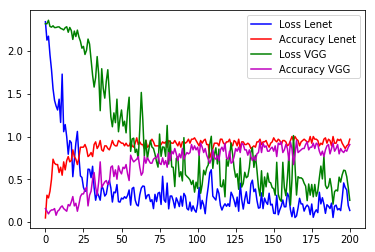

In [53]:
# After the execution is done, let's plot the values.
pyplot.plot(loss_lenet, 'b')
pyplot.plot(accuracy_lenet, 'r')
pyplot.plot(loss_vgg, 'g')
pyplot.plot(accuracy_vgg, 'm')
pyplot.legend(('Loss Lenet', 'Accuracy Lenet', 'Loss VGG', 'Accuracy VGG'), loc='upper right')

#### Visualize Filters (Step Through)

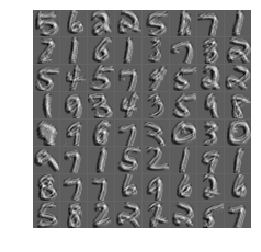

In [54]:
pyplot.figure()
# We look into the first conv layer output. Change this to conv2 in order to look into the second one. 
conv = workspace.FetchBlob('conv1')

# We can look into any channel. Think of it as a feature model learned.
# In this case we look into the 5th channel. Play with other channels to see other features
conv = conv[:,[5],:,:]

_ = visualize.NCHW.ShowMultiple(conv)